In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
from tqdm import tqdm


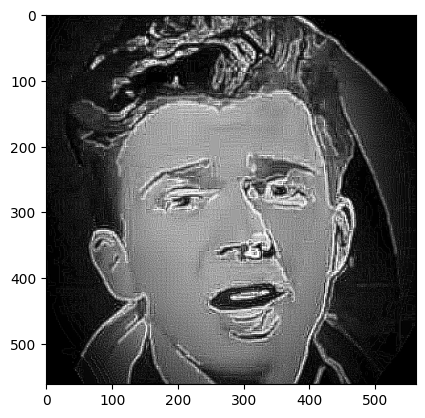

In [4]:
img = cv2.imread("rick_vig.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (img.shape[1] * 2, img.shape[0] * 2))

img_pil = Image.fromarray(img)
img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
enhanced = cv2.Canny(img, 30, 70)

img = np.array(img_pil)
img = cv2.addWeighted(img, 0.9, cv2.GaussianBlur(enhanced, (5, 5), 7), 1.0, 0)


plane = np.full_like(img, 255)
plane[0, 0] = 0
plane[0, 1] = 255


imshow(img, cmap="gray")


In [5]:
def generate_circle_points(center, radius, n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    points = [
        (center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle))
        for angle in angles
    ]
    return points


center = (280, 280)
radius = 280
n = 200
circle_points = generate_circle_points(center, radius, n)

# Plot the points on the image
# for point in circle_points:
# img_gray[int(point[1]), int(point[0])] = 255

# imshow(img_gray, cmap="gray")

spagat = [0]


In [57]:
def get_diagonal(mat):
    # print(mat)
    k = min(mat.shape) / max(mat.shape)
    x, y = 0, 0

    to_right = mat.shape[0] < mat.shape[1]

    pole = []

    while max(x, y) != max(mat.shape):
        # print()
        # print(int(y), int(x), mat.shape)
        # print(x, y)
        # print(mat[int(y), int(x)], end=" ")
        pole.append(mat[int(y), int(x)])
        if to_right:
            x += 1
            y += k
        else:
            y += 1
            x += k

    return pole


 40%|████      | 4/10 [00:00<00:00, 17.04it/s]

[199, 287.4566115702479]
[4, 287.4566115702479]
[199, 287.4566115702479]
[4, 287.4566115702479]


 80%|████████  | 8/10 [00:00<00:00, 17.06it/s]

[199, 287.4566115702479]
[4, 287.4566115702479]
[199, 287.4566115702479]
[4, 287.4566115702479]


100%|██████████| 10/10 [00:00<00:00, 16.76it/s]

[199, 287.4566115702479]
[4, 287.4566115702479]


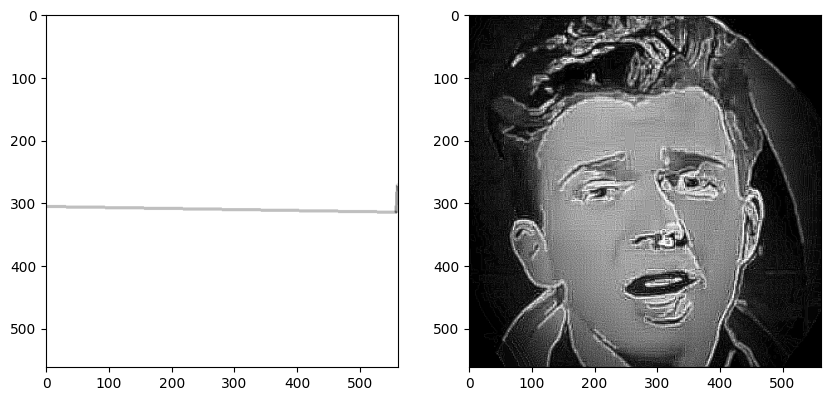

In [82]:
import math


for _ in tqdm(range(10)):
    actual = spagat[-1]
    act_point = circle_points[actual]
    best = [-1, math.inf]
    for i, point in enumerate(circle_points):

        if i in range(actual - 1, actual + 1):
            continue

        # print(i)
        point = (int(point[0]), int(point[1]))
        act_point = (int(act_point[0]), int(act_point[1]))

        if act_point[0] == point[0] or act_point[1] == point[1]:
            # print('here')
            continue

        # target = img[
        #     int(act_point[0]) : int(point[0]), int(act_point[1]) : int(point[1])
        # ]
        from_x = min(int(act_point[0]), int(point[0]))
        to_x = max(int(act_point[0]), int(point[0]))
        from_y = min(int(act_point[1]), int(point[1]))
        to_y = max(int(act_point[1]), int(point[1]))

        target = img[from_x:to_x, from_y:to_y]
        prediction = plane[from_x:to_x, from_y:to_y]

        # imshow(prediction)

        # print(act_point, point)

        error = abs(
            np.mean(np.array(get_diagonal(target)) - np.array(get_diagonal(prediction)))
        )

        if error < best[1]:
            best = [i, error]

        #############

    spagat.append(best[0])
    print(best)

    line_plane = cv2.line(
        np.full_like(plane, 0),
        tuple(map(int, circle_points[actual])),
        tuple(map(int, circle_points[best[0]])),
        32,
        3,
    )

    plane = plane - line_plane


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(plane, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img, cmap="gray")
